In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/SKRIPSI/Validation_DQLab5.xlsx')
print(data.head())

                                               Tweet Sentiment
0  teman kuliah ilmu mengoding tenang ajar banget...       POS
1                      materi dqlab baca novel fiksi       NET
2         sedih koordinator magang dqlab pamit undur       NET
3                               bootcamp dqlab hadir       NEG
4                  ngomong-ngomong dqlab seru banget       POS


In [ ]:
data['Sentiment']=data.Sentiment.map({'POS':2,'NET':1,'NEG':0})
x = data.Tweet
y = data.Sentiment
print(x.head())
print(y.head())

0    teman kuliah ilmu mengoding tenang ajar banget...
1                        materi dqlab baca novel fiksi
2           sedih koordinator magang dqlab pamit undur
3                                 bootcamp dqlab hadir
4                    ngomong-ngomong dqlab seru banget
Name: Tweet, dtype: object
0    2
1    1
2    1
3    0
4    2
Name: Sentiment, dtype: int64


In [ ]:
y.value_counts()

1    114
2     36
0     10
Name: Sentiment, dtype: int64

In [ ]:
x.head()

0    teman kuliah ilmu mengoding tenang ajar banget...
1                        materi dqlab baca novel fiksi
2           sedih koordinator magang dqlab pamit undur
3                                 bootcamp dqlab hadir
4                    ngomong-ngomong dqlab seru banget
Name: Tweet, dtype: object

In [ ]:
x = x.values.astype('U')

In [ ]:
Tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, norm=None, smooth_idf=True).fit(x)
tfidf_text = Tfidf_vectorizer.transform(x)

In [ ]:
X = Tfidf_vectorizer.fit_transform(x)

In [ ]:
feature_names = Tfidf_vectorizer.get_feature_names_out()

In [ ]:
def tf_idf(text):
  tfidf_matrix = Tfidf_vectorizer.transform([text]).todense()
  features_index = X[0,:].nonzero()[1]
  skor = zip([feature_names[i] for i in features_index], [X[0,y] for y in features_index])
  return dict(skor)

In [ ]:
text = 'teman kuliah ilmu mengoding tenang ajar banget dasar kakak'
tf_idf(text)

{'ajar': 2.749199854809259,
 'banget': 4.13549421592915,
 'dasar': 4.982792076316353,
 'ilmu': 4.982792076316353,
 'kakak': 4.289644895756409,
 'kuliah': 4.289644895756409,
 'mengoding': 4.982792076316353,
 'teman': 3.4423470353692043,
 'tenang': 5.388257184424518}

In [ ]:
Tfidf_vectorizer.get_feature_names_out()

array(['academi', 'academy', 'academydqlabid', 'ada', 'adakan', 'adik',
       'admin', 'ai', 'airpods', 'ajar', 'akbar', 'akses', 'akun',
       'algorithm', 'alih', 'all', 'altera', 'ambil', 'analis', 'analisa',
       'analisis', 'analyst', 'anjak', 'anjing', 'april', 'asah', 'asli',
       'ass', 'awan', 'baca', 'bagai', 'bagi', 'bagus', 'bahas', 'bahasa',
       'bakti', 'balap', 'banding', 'bandung', 'bangalore', 'banget',
       'bangun', 'bank', 'bantu', 'banyak', 'barat', 'bareng', 'basis',
       'bayar', 'bea', 'beasiswa', 'bebas', 'beda', 'belah', 'belakang',
       'beli', 'bentrok', 'bidang', 'binar', 'bingung', 'biru', 'bisa',
       'bitdegree', 'blue', 'bogor', 'boot', 'bootcamp', 'buildwithangga',
       'buka', 'buku', 'bulan', 'business', 'buta', 'butuh', 'calon',
       'camp', 'cantum', 'cari', 'case', 'cek', 'celerates', 'channel',
       'class', 'cloud', 'cloudswyft', 'coba', 'codecademy', 'codenya',
       'coding', 'codingannya', 'colok', 'compiler', 'confess

In [ ]:
df = pd.DataFrame(tfidf_text.todense().T,
                  index = Tfidf_vectorizer.get_feature_names_out(),
                  columns = [f'D{i+1}' for i in range(len(x))])

df.head(10)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D151,D152,D153,D154,D155,D156,D157,D158,D159,D160
academi,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
academy,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.471966,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
academydqlabid,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
ada,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
adakan,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
adik,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
admin,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
ai,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
airpods,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
ajar,2.7492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.7492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4984


In [ ]:
print(tfidf_text)

  (0, 429)	0.4052005729303355
  (0, 428)	0.2588668178253664
  (0, 269)	0.37470932344365465
  (0, 229)	0.3225841881587595
  (0, 199)	0.3225841881587595
  (0, 170)	0.37470932344365465
  (0, 102)	0.37470932344365465
  (0, 40)	0.3109919531102617
  (0, 9)	0.20674168254047123
  (1, 297)	0.5643383519453289
  (1, 265)	0.3231774288271193
  (1, 137)	0.5643383519453289
  (1, 118)	0.12957977618066244
  (1, 29)	0.49174168030473253
  (2, 456)	0.4592409064494532
  (2, 376)	0.4592409064494532
  (2, 307)	0.4592409064494532
  (2, 254)	0.38114549045975366
  (2, 223)	0.4592409064494532
  (2, 118)	0.10544797046947758
  (3, 158)	0.7451917855223995
  (3, 118)	0.23736392321378108
  (3, 66)	0.623175393245353
  (4, 391)	0.4210095070081653
  (4, 293)	0.8420190140163306
  :	:
  (157, 85)	0.4192838156135854
  (158, 453)	0.6273395838513249
  (158, 338)	0.748245725946967
  (158, 118)	0.21580866557055237
  (159, 452)	0.2437949575315685
  (159, 433)	0.2437949575315685
  (159, 400)	0.2437949575315685
  (159, 371)	0.225

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_text,y,test_size= 0.30, random_state=0)

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_predict = svc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.75


col_0,1,2
Sentiment,,
0,2,0
1,36,3
2,7,0


In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x_train_smote, y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_smote))

Before SMOTE:  Counter({1: 75, 2: 29, 0: 8})
After SMOTE:  Counter({1: 75, 2: 75, 0: 75})


In [ ]:
svc1 = SVC().fit(x_train_smote,y_train_smote)
svc_predict = svc1.predict(x_test)
print(accuracy_score(y_test,svc_predict))
pd.crosstab(y_test,svc_predict)

0.75


col_0,1,2
Sentiment,,
0,2,0
1,36,3
2,7,0


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model = SVC().fit(x_train_smote,y_train_smote)

In [ ]:
model1 = SVC().fit(x_train,y_train)

In [ ]:
pred_svm_1 = model1.predict(x_test)
print(classification_report(pred_svm_1,y_test))

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       0.95      0.83      0.89        42
           2       0.60      0.60      0.60         5

    accuracy                           0.81        48
   macro avg       0.57      0.81      0.59        48
weighted avg       0.89      0.81      0.84        48



In [ ]:
pred_svm = model.predict(x_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.95      0.90      0.92        39
           2       0.60      0.60      0.60         5

    accuracy                           0.88        48
   macro avg       0.74      0.83      0.77        48
weighted avg       0.89      0.88      0.88        48



In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(pred_svm, y_test)

0.8324786324786325

In [ ]:
pred_svm 

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nbc = MultinomialNB().fit(x_train_smote, y_train_smote)

In [ ]:
nbc1 = MultinomialNB().fit(x_train, y_train)

In [ ]:
pred_nbc_1 = nbc1.predict(x_test)
print(classification_report(pred_nbc_1, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87        48
           2       0.00      0.00      0.00         0

    accuracy                           0.77        48
   macro avg       0.33      0.26      0.29        48
weighted avg       1.00      0.77      0.87        48



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred_nbc = nbc.predict(x_test)
print(classification_report(pred_nbc, y_test))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.81      1.00      0.90        30
           2       1.00      0.45      0.62        11

    accuracy                           0.83        48
   macro avg       0.88      0.72      0.76        48
weighted avg       0.86      0.83      0.82        48



In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(pred_nbc, y_test)

0.722943722943723

In [ ]:
pred_nbc

array([1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2,
       2, 1, 0, 0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

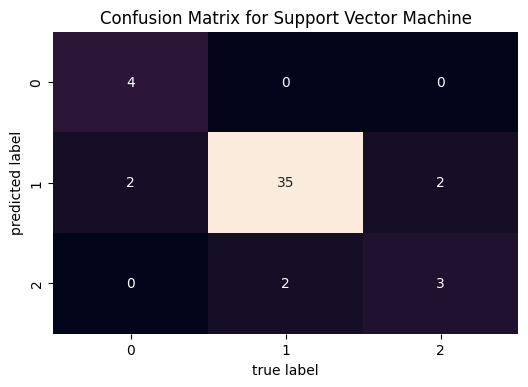

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat= confusion_matrix(y_test, pred_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

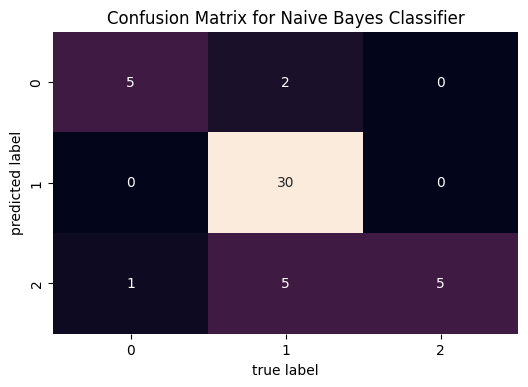

In [ ]:
plt.figure(dpi=100)
mat= confusion_matrix(y_test, pred_nbc)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()